1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 양성종양
6 : 양성종양
7 : 악성종양
8 : 악성종양
12 : 악성종양


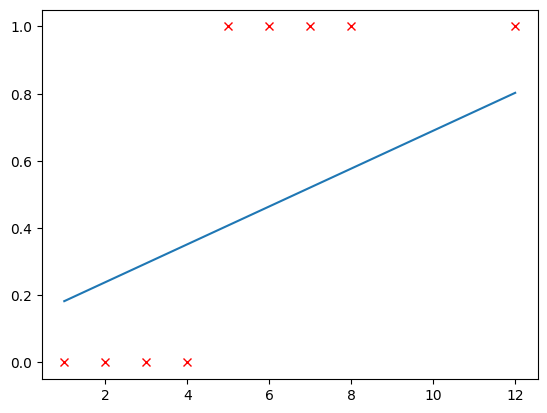

In [2]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        y_hat = x * self.w + self.b       # 직선 방정식을 계산합니다
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        return z
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i) # 정방향 계산
                y_hat = self.activation(y_hat)
                err = y_hat - y_i       # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.01*w_grad          # 가중치 업데이트
                self.b -= 0.01*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8,12])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

y_temp = []
for x_i in x:
    y_hat = neuron.forpass(x_i)
    if( y_hat >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(y_hat)

plt.plot(x,y_temp)
plt.show()

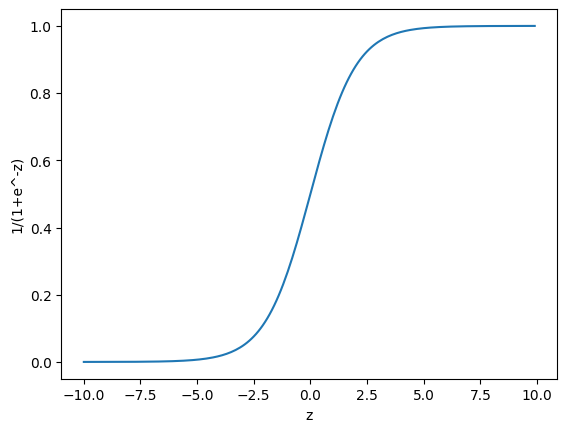

In [3]:
zs = np.arange(-10., 10., 0.1)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

### binary crossentropy 구현

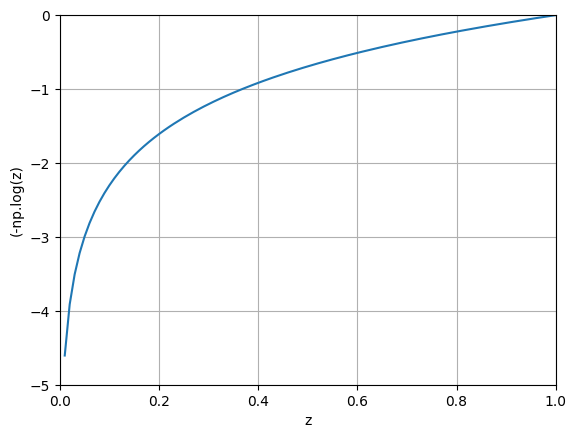

In [7]:
zs = np.arange(0.01, 10., 0.01)
gs = [np.log(z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(-5,0)
plt.xlabel('z')
plt.ylabel('(-np.log(z)')
plt.grid(True)
plt.show()

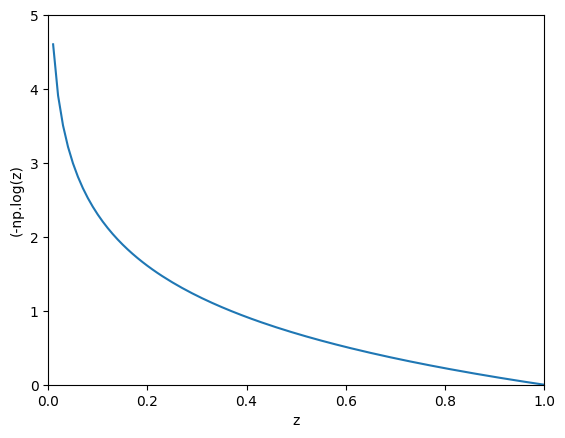

In [8]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('(-np.log(z)')
plt.show()

C:\Users\jikim\AppData\Local\Temp\ipykernel_35796\1341036461.py:2: RuntimeWarning: divide by zero encountered in log
  gs = [-np.log(1-z) for z in zs]
C:\Users\jikim\AppData\Local\Temp\ipykernel_35796\1341036461.py:2: RuntimeWarning: invalid value encountered in log
  gs = [-np.log(1-z) for z in zs]


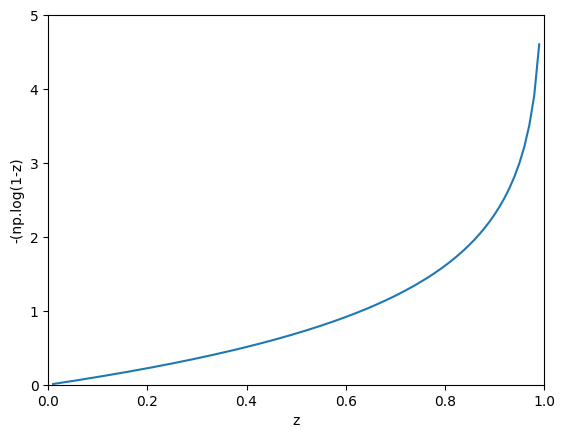

In [9]:
zs = np.arange(0.01, 10., 0.01)
gs = [-np.log(1-z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.xlabel('z')
plt.ylabel('-(np.log(1-z)')
plt.show()

1 : 양성종양
2 : 양성종양
3 : 양성종양
4 : 양성종양
5 : 악성종양
6 : 악성종양
7 : 악성종양
8 : 악성종양
20 : 악성종양


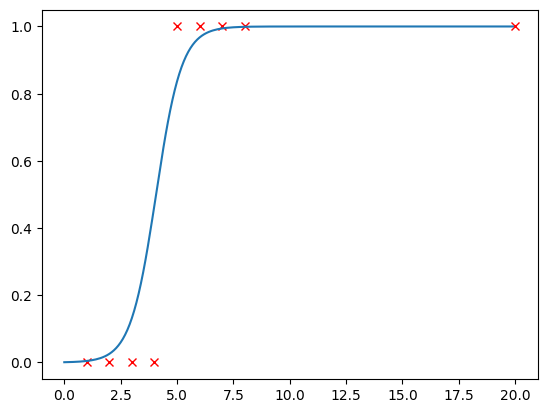

In [6]:
import matplotlib.pyplot as  plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0     # 가중치를 초기화합니다
        self.b = 1.0     # 절편을 초기화합니다
    
    def forpass(self, x):
        z = x * self.w + self.b       # 직선 방정식을 계산합니다
        return z
    
    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
#         a = z;
        a = 1/(1+np.exp(-z))
        return a
    
    def fit(self, x, y, epochs=200):
        for i in range(epochs):           # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
                z = self.forpass(x_i) # 정방향 계산
                a = self.activation(z)
                err = a - y_i      # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= 0.1*w_grad          # 가중치 업데이트
                self.b -= 0.1*b_grad          # 절편 업데이트

# x = np.array([1,2,3,4,5,6,7,8])
# y = np.array([0,0,0,0,1,1,1,1])
x = np.array([1,2,3,4,5,6,7,8,20])
y = np.array([0,0,0,0,1,1,1,1,1])                

neuron = Neuron()
neuron.fit(x, y)

for xi, yi in zip(x,y):
    plt.plot(xi,yi,"rx")

for x_i in x:
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    if( a >= 0.5 ):
        print("%d : 악성종양"%x_i)
    else:
        print("%d : 양성종양"%x_i)
    y_temp.append(a)

x = np.arange(0,x[-1],0.1)
y_temp = []
  
for i, x_i in enumerate(x):
    y_hat = neuron.forpass(x_i)
    a = neuron.activation(y_hat)
    y_temp.append(a)    
    
plt.plot(x,y_temp)
plt.show()

In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [11]:
cancer.data[:3]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

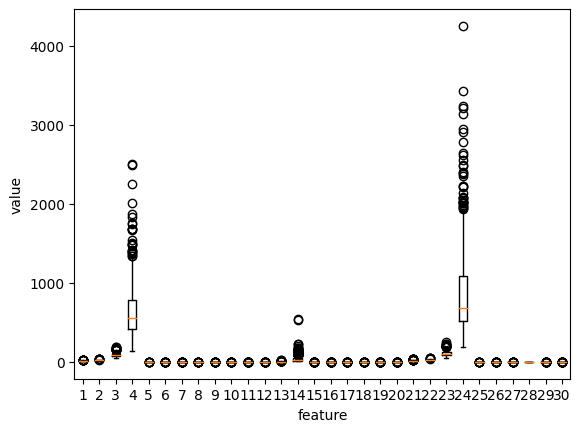

In [12]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [13]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
cancer.feature_names[[3,23]]

array(['mean area', 'worst area'], dtype='<U23')

In [15]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [16]:
np.unique(cancer.target)

array([0, 1])

In [17]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [18]:
x = cancer.data
print(x.shape)
y = cancer.target
print(y.shape)
print(y)

(569, 30)
(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    test_size=0.2, random_state=42)

In [21]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [22]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [23]:
print(x_train.shape)
print(x_train.shape[1])
w=np.ones(x_train.shape[1])
print(w)
# temp = np.zeros((2,3))
# print(temp)
# temp1 = np.full((2,3),7)
# print(temp1)

(455, 30)
30
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [24]:

class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
#         print(x)
#         print(self.w)
        z = np.sum(x * self.w) + self.b  # 직선 방정식을 계산합니다
#         print(z)
        return z

    def backprop(self, x, err):
        w_grad = x * err    # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err    # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None) # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))  # 시그모이드 계산
        return a
        
    def fit(self, x, y, epochs=100, rate = 0.01):   
        print("x.shape=", x.shape)   # (455,30)
        self.w = np.ones(x.shape[1])      # 가중치를 초기화합니다.
        print(self.w.shape)          # (30,)
        self.b = 0                        # 절편을 초기화합니다.
#         print(x.shape[1])
        for i in range(epochs):           # epochs만큼 반복합니다
            for x_i, y_i in zip(x, y):    # 모든 샘플에 대해 반복합니다
#                 print("x_i.shape=", x_i.shape)  # x.shape=(455,30)  x[0].shape=(30,)
#                 print("y_i.shape=", y_i.shape)  # y.shape=(455,)    y[0].shape=()
                
                z = self.forpass(x_i)     # 정방향 계산
                a = self.activation(z)    # 활성화 함수 적용
#                 print("a=", a)
#                 print("y_i=", y_i)
                err = (a-y_i)          # 오차 계산
#                 print("err=", err)
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
                self.w -= rate*w_grad          # 가중치 업데이트
                self.b -= rate*b_grad          # 절편 업데이트

                
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]    # 정방향 계산
        a = self.activation(np.array(z))        # 활성화 함수 적용
        return a >= 0.5

In [25]:
print(x_train.shape)

(455, 30)


In [26]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train, 1000)

x.shape= (455, 30)
(30,)


In [27]:
print(neuron.predict(x_test))
print(y_test)
print(neuron.predict(x_test)== y_test)

[False  True False False False False  True False False False  True False
  True False False False False  True  True  True False False  True  True
 False False False  True  True False  True  True  True  True False  True
  True  True False False  True  True  True False False False  True  True
  True False  True False  True False  True  True  True False False  True
  True  True  True False False False False  True False  True  True  True
  True False False False  True  True  True  True False  True False  True
 False  True  True  True False False  True  True False False False  True
 False  True False False False False  True  True False False  True False
  True False  True False False  True]
[0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 1]
[ True  True  True False  True False  True  True  True  True  True  True

In [28]:
np.mean(neuron.predict(x_test) == y_test)

0.8157894736842105